# Random Forest Regressor Model for House Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Generating a synthetic dataset: Predicting house prices
np.random.seed(42)
num_samples = 500

In [3]:
# Features
square_feet = np.random.randint(800, 4000, num_samples)  # House size in square feet
bedrooms = np.random.randint(1, 6, num_samples)  # Number of bedrooms
location_score = np.random.randint(1, 10, num_samples)  # Location rating (1-10)

In [4]:
# Target variable (house price in $1000s)
house_price = (square_feet * 0.15) + (bedrooms * 30) + (location_score * 50) + np.random.normal(0, 100, num_samples)

# Creating a DataFrame
df = pd.DataFrame({'Square_Feet': square_feet, 'Bedrooms': bedrooms, 'Location_Score': location_score, 'House_Price': house_price})

In [5]:
# Splitting the data
X = df[['Square_Feet', 'Bedrooms', 'Location_Score']]
y = df['House_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Training the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Predictions
y_pred = rf_model.predict(X_test)

In [10]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying metrics
mae, r2

(91.73497619563744, 0.7334211168345819)

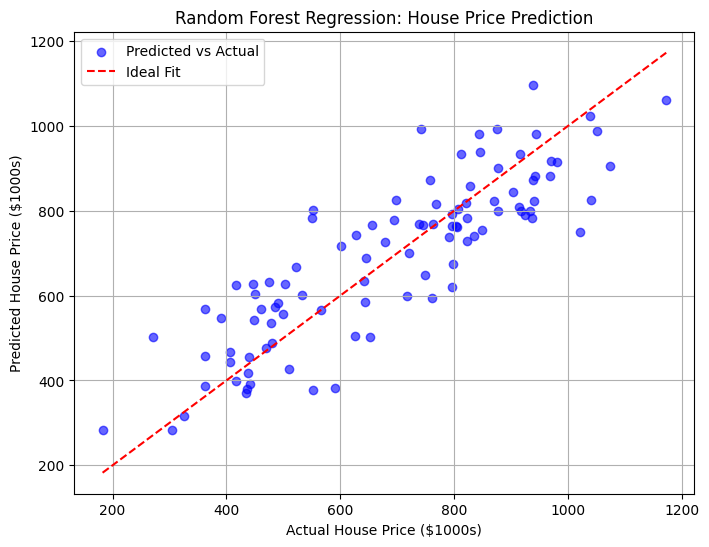

In [11]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual House Price ($1000s)")
plt.ylabel("Predicted House Price ($1000s)")
plt.title("Random Forest Regression: House Price Prediction")
plt.legend()
plt.grid()
plt.show()

